In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Re-organize


```
  gitclone
  ├── mmfashion
  |  ├── tools
  |  ├── configs
  |  ├── data
  |  │   ├──Consumer_to_shop
  |  │   |    ├── Anno
  |  │   |    │   ├── list_attr_cloth.txt
  |  │   |    │   ├── list_attr_items.txt
  |  │   |    │   ├── list_attr_type.txt
  |  │   |    │   ├── list_bbox_consumer2shop.txt
  |  │   |    │   ├── list_item_consumer2shop.txt
  |  │   |    │   └── list_landmarks_consumer2shop.txt
  |  │   |    ├── Eval
  |  │   |    │   └── list_eval_partition.txt
  |  │   |    └── Img
  |  │   |    |   ├── img
  |  |   |    |   |    ├──CLOTHING
  |  |   |    |   |    ├──DRESSES
  |  |   |    |   |    ├──TOPS
  |  |   |    |   |    ├──TROUSERS
  |  |   ├── prepare_consumer_to_shop.py    

```


# 1. Clone github

In [2]:
%cd /content/drive/MyDrive/gitclone
#! git clone --recursive https://github.com/open-mmlab/mmfashion.git
%cd mmfashion
!python setup.py install

/content/drive/MyDrive/gitclone
/content/drive/MyDrive/gitclone/mmfashion
running install
running bdist_egg
running egg_info
writing mmfashion.egg-info/PKG-INFO
writing dependency_links to mmfashion.egg-info/dependency_links.txt
writing requirements to mmfashion.egg-info/requires.txt
writing top-level names to mmfashion.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'mmfashion.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmfashion
copying build/lib/mmfashion/__init__.py -> build/bdist.linux-x86_64/egg/mmfashion
copying build/lib/mmfashion/version.py -> build/bdist.linux-x86_64/egg/mmfashion
creating build/bdist.linux-x86_64/egg/mmfashion/apis
copying build/lib/mmfashion/apis/utils.py -> build/bdist.linux-x86_64/egg/mmfashion/apis
copying build/lib/mmfashion/apis/train_fashion_recommender.py -> build/bdist.linux-x86

# 2. Chuẩn bị dữ liệu

Download dữ liệu về lưu trong folder data/

In [ ]:
%cd /content/drive/MyDrive/gitclone/mmfashion

/content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion


In [ ]:
%cd data

/content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion/data


In [ ]:
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion/data
Consumer_to_shop      prepare_consumer_to_shop.py  prepare_landmark_detect.py
prepare_attr_pred.py  prepare_in_shop.py


In [ ]:
!python prepare_consumer_to_shop.py

# 3. Download checkpoint


```
gitclone
  ├── mmfashion
  |  ├── tools
  |  ├── configs
  |  ├── data
  |  ├── checkpoint
  |  |  ├── vgg16.pth  
```



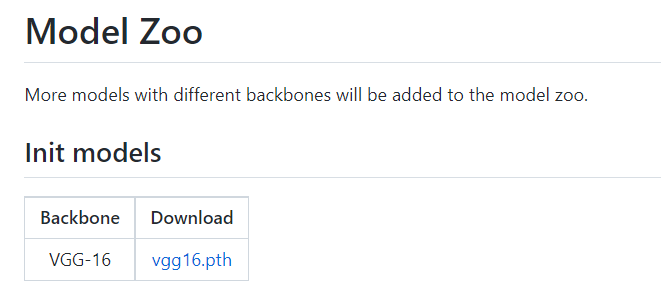

# 4. Training

- Chỉnh lại GPU, số epoch, interval

In [ ]:
!pip install mmcv==0.4.0

     |████████████████████████████████| 53 kB 1.6 MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.0-cp37-cp37m-linux_x86_64.whl size=170769 sha256=bdf0ff02afb90d9b06a79cb3136c5220050755432779eb9d4a3daa87c01f628e
  Stored in directory: /root/.cache/pip/wheels/47/93/9b/36cd4ebd31be24b4fb0f76f5cbae9a8b9a9c9559428d9edfef
Successfully built mmcv
  Attempting uninstall: mmcv
    Found existing installation: mmcv 1.4.7
    Uninstalling mmcv-1.4.7:
      Successfully uninstalled mmcv-1.4.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmfashion 0.4.0 requires mmcv>=0.5.1, but you have mmcv 0.4.0 which is incompatible.


In [ ]:
%cd "/content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion"

/content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion


In [ ]:
!python tools/train_retriever.py \
--config './configs/retriever_consumer_to_shop/roi_retriever_vgg.py/'\

2022-03-28 13:54:52,784 - INFO - Distributed training: False
2022-03-28 13:54:54,501 - INFO - load model from: checkpoint/vgg16.pth
pretrained model checkpoint/vgg16.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: classifier.0.weight, classifier.0.bias, classifier.3.weight, classifier.3.bias, classifier.6.weight, classifier.6.bias

model built
unexpected key in source state_dict: classifier.0.weight, classifier.0.bias, classifier.3.weight, classifier.3.bias, classifier.6.weight, classifier.6.bias

Initialize model weights from checkpoint/vgg16.pth
dataset loaded
dataloader built
model paralleled
2022-03-28 13:55:02,667 - INFO - Start running, host: root@3c4314182c8a, work_dir: /content/drive/.shortcut-targets-by-id/1hdbWgTRyCaM9FVipahU2ZLjQJjXY0wgW/gitclone/mmfashion/checkpoint/Retrieve_Consumer_to_Shop/vgg/roi
2022-03-28 13:55:02,668 - INFO - workflow: [('train', 100)], max: 3 epochs
/usr/local/lib/python3.7/dist-packages/torch/nn/functio

# 5. Testing

In [ ]:
! python tools/test_retriever.py \
    --config '/content/drive/MyDrive/gitclone/mmfashion/configs/retriever_consumer_to_shop/roi_retriever_vgg.py' \
    --checkpoint '/content/drive/MyDrive/gitclone/mmfashion/checkpoint/Retrieve_Consumer_to_Shop/vgg/roi/epoch_3.pth'

Streaming output truncated to the last 5000 lines.
Recall@50 = 4.02
[3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927]
--------------- Retrieval Evaluation ------------
Recall@3 = 0.55
Recall@5 = 0.75
Recall@10 = 1.27
Recall@20 = 2.06
Recall@30 = 2.78
Recall@50 = 4.02
[3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927]
--------------- Retrieval Evaluation ------------
Recall@3 = 0.55
Recall@5 = 0.75
Recall@10 = 1.27
Recall@20 = 2.06
Recall@30 = 2.78
Recall@50 = 4.02
[3928, 3929, 3930, 3931, 3932, 3933]
--------------- Retrieval Evaluation ------------
Recall@3 = 0.55
Recall@5 = 0.75
Recall@10 = 1.27
Recall@20 = 2.06
Recall@30 = 2.78
Recall@50 = 4.02
[3928, 3929, 3930, 3931, 3932, 3933]
--------------- Retrieval Evaluation ------------
Recall@3 = 0.55
Recall@5 = 0.76
Recall@10 = 1.27
Recall@20 = 2.06
Recall@30 = 2.78
Recall@50 = 4.02
[3928, 3929, 3930, 3931, 3932, 3933]
--------------- Retrieval Evaluation ------------
Recall@3 = 0.54
Recall@5 = 0.76
Recall@10 = 1.27
Recall@20 = 2.06
Recall@